ЛАБОРАТОРНАЯ РАБОТА №9. ПОНИЖЕНИЕ РАЗМЕРНОСТИ. ОТ-БОР ПРИЗНАКОВ. ИЗВЛЕЧЕНИЕ ПРИЗНАКОВ

ЗАДАНИЕ №1.
1. Для выполнения задания №1 используйте датасеты для задачи классификации и регрессии.
2. С помощью классов библиотеки sklearn выполните понижение размерности (размерность выберите сами, можно разные) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).
3. Выберите две модели (одна - для регрессии и другая - для классификации). Обучите выбранные модели с использованием данных в пространстве низкой размерности - используйте результаты выполнения пункта 3 (не забудьте, что понижать нужно и X_train и X_test, но проще всего понижать X).
4. Сформулируйте вывод о том, какие методы понижения размерности лучше всего подходят для Ваших данных.

# Задание 1

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import numpy as np

In [2]:
df1 = pd.read_csv("../data/Lab3_Koren_Regression.csv")
df2 = pd.read_csv("../data/card_transdata.csv")

In [3]:
df1.shape

(29378, 935)

In [4]:
df2.shape

(1000000, 8)

In [5]:
X1 = df1.drop(['Price'], axis=1)
y1 = df1['Price']

X2 = df2.drop(['fraud'], axis=1)
y2 = df2['fraud']

In [6]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
def test_cl(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [8]:
np.random.seed(42)

In [9]:
test_cl(X2, y2)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273833
         1.0       1.00      1.00      1.00     26167

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



In [10]:
def test_reg(X, y):
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  bag = BaggingRegressor().fit(x_train, y_train)
  print(f'MAE: {mean_absolute_error(y_test, bag.predict(x_test))}')
  print(f'MSE: {mean_squared_error(y_test, bag.predict(x_test))}')
  print(f'R^2: {bag.score(x_test, y_test)}')

In [11]:
test_reg(X1,y1)

MAE: 1306.748139323803
MSE: 4284276.633699796
R^2: 0.8451536140951281


### Variance Treshold

In [12]:
df2.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.feature_selection import VarianceThreshold
# параметр - порог значения дисперсии
# будут отобраны только те признаки, у которых дисперсия выше
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X2)

print(X2.shape)
print(X_vt.shape)

X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
test_cl(X_vt, y2)

(1000000, 7)
(1000000, 3)
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96    273833
         1.0       0.61      0.55      0.58     26167

    accuracy                           0.93    300000
   macro avg       0.79      0.76      0.77    300000
weighted avg       0.93      0.93      0.93    300000



In [14]:
df1.describe()

,Unnamed: 0,Year,Distance,Engine_capacity,Transmission,Price,ARO,Abarth,Acura,Alfa Romeo,...,Roadster.1,SUV,Sedan,Universal,Diesel,Electric,Hybrid,Metan/Propan,Petrol,Plug-in Hybrid
count,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,...,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,29378.000000,29378.00000
mean,20593.092076,2008.155491,163276.014705,1745.563789,0.381850,7362.696201,0.000068,0.000034,0.000306,0.001123,...,0.000681,0.066240,0.288379,0.206719,0.467527,0.000681,0.054258,0.107393,0.358091,0.01205
std,11703.108896,6.758941,96746.529978,367.014083,0.485848,5244.898250,0.008251,0.005834,0.017501,0.033497,...,0.026083,0.248705,0.453016,0.404959,0.498953,0.026083,0.226531,0.309618,0.479447,0.10911
min,0.000000,1989.000000,0.000000,750.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,10535.250000,2004.000000,101546.500000,1461.000000,0.000000,3300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,20571.500000,2009.000000,170000.000000,1600.000000,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,30706.750000,2013.000000,225000.000000,2000.000000,1.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000
max,41006.000000,2021.000000,440000.000000,2720.000000,1.000000,24500.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [15]:
vt = VarianceThreshold(20)
X_vt = vt.fit_transform(X1)

print(X1.shape)
print(X_vt.shape)

X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
test_reg(X_vt, y1)

(29378, 934)
(29378, 4)
MAE: 1804.4200703426368
MSE: 6683992.149032222
R^2: 0.7554944830358565


### SelectKBest

In [16]:
from sklearn.feature_selection import SelectKBest

In [17]:
skb = SelectKBest(k=4)
X_skb = skb.fit_transform(X2, y2)

print(X2.shape)
print(X_skb.shape)

X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
test_cl(X_skb, y2)

(1000000, 7)
(1000000, 4)
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    273833
         1.0       0.91      0.86      0.89     26167

    accuracy                           0.98    300000
   macro avg       0.95      0.93      0.94    300000
weighted avg       0.98      0.98      0.98    300000



In [18]:
skb = SelectKBest(k=400)
X_skb = skb.fit_transform(X1, y1)

print(X1.shape)
print(X_skb.shape)

X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
test_reg(X_skb, y1)

D:\university\ML\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 10  14  30  41  50  57  59  61  69  83  89 112 118 135 137 159 174 181
 183 192 193 194 195 208 215 233 238 244 255 263 264 266 298 300 303 317
 318 319 324 325 327 328 342 345 352 357 363 368 370 379 384 392 393 397
 399 405 407 412 413 414 419 434 443 444 445 446 448 449 451 453 457 463
 469 470 486 488 490 498 504 537 538 550 557 561 562 563 564 568 571 586
 587 588 592 594 599 606 612 622 629 634 642 643 649 652 661 676 677 678
 683 684 690 691 696 703 707 713 719 728 731 734 736 739 744 755 757 759
 764 765 767 769 772 786 793 801 803 822 823 826 835 853 868 876 877 878
 895 898 901 904 907] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
D:\university\ML\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
D:\university\M

(29378, 934)
(29378, 400)
MAE: 1345.344939868391
MSE: 4522256.2053358285
R^2: 0.8341755383428727


### RFE

In [19]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=4).fit(X2, y2)
X_rfe = pd.DataFrame(rfe.transform(X2), columns=rfe.get_feature_names_out())

print(X2.shape)
print(X_rfe.shape)

test_cl(X_rfe, y2)

(1000000, 7)
(1000000, 4)
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    273833
         1.0       0.91      0.86      0.88     26167

    accuracy                           0.98    300000
   macro avg       0.95      0.93      0.94    300000
weighted avg       0.98      0.98      0.98    300000



In [22]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=500).fit(X1[:10000], y1[:10000])
X_rfe = pd.DataFrame(rfe.transform(X1), columns=rfe.get_feature_names_out())

print(X1.shape)
print(X_rfe.shape)

test_reg(X_rfe, y1)

(29378, 934)
(29378, 500)
MAE: 1320.5398343544364
MSE: 4268186.481260495
R^2: 0.8470108155401724


### PCA

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X2, y2)

print(X2.shape)
print(X_pca.shape)

test_cl(X_pca, y2)
# посмотрим сколько информации сохранилось
sum(pca.explained_variance_ratio_)

(1000000, 7)
(1000000, 4)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273833
         1.0       1.00      1.00      1.00     26167

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



0.9999151705870709

In [25]:
pca = PCA(n_components=500)
X_pca = pca.fit_transform(X1, y1)

print(X1.shape)
print(X_pca.shape)

test_reg(X_pca, y1)
sum(pca.explained_variance_ratio_)

(29378, 934)
(29378, 500)
MAE: 1316.5416496482867
MSE: 4280792.926792603
R^2: 0.8429901840562575


0.9999999999982868

### tSNE

In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X2[:20000])

print(X2[:20000].shape)
print(X_tsne.shape)

test_cl(X_tsne, y2[:20000])

(20000, 7)
(20000, 2)
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      5477
         1.0       0.64      0.51      0.57       523

    accuracy                           0.93      6000
   macro avg       0.80      0.74      0.77      6000
weighted avg       0.93      0.93      0.93      6000



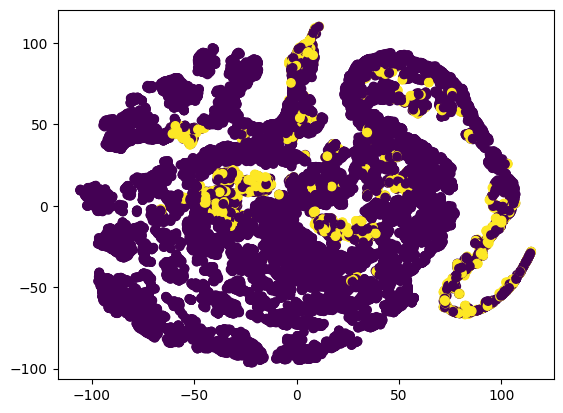

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y2[:20000])

In [40]:
tsne = TSNE(n_components=2)
X_tsner = tsne.fit_transform(X1[:10000])

print(X1[:10000].shape)
print(X_tsner.shape)

test_reg(X_tsner, y1[:10000])

(10000, 934)
(10000, 2)
MAE: 4052.2280333333338
MSE: 27773826.926203333
R^2: 0.012295181202057526


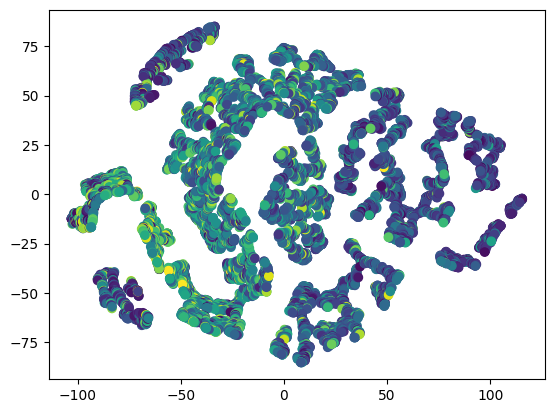

In [42]:

plt.scatter(X_tsner[:,0], X_tsner[:,1], c=y1[:10000])

### Isomap

In [44]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
X_iso = isomap.fit_transform(X2[:20000])

print(X2[:20000].shape)
print(X_iso.shape)

test_cl(X_iso, y2[:20000])

(20000, 7)
(20000, 2)
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      5477
         1.0       0.48      0.28      0.35       523

    accuracy                           0.91      6000
   macro avg       0.70      0.62      0.65      6000
weighted avg       0.89      0.91      0.90      6000



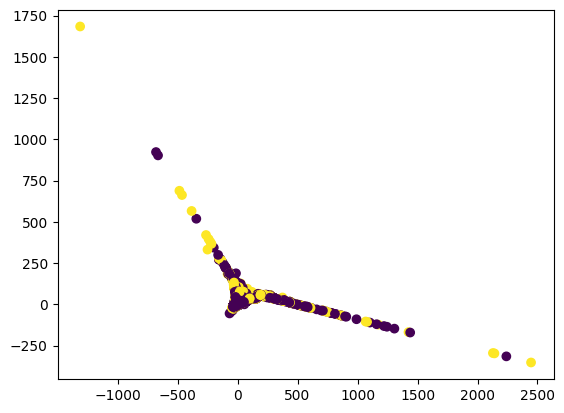

In [45]:
plt.scatter(X_iso[:,0], X_iso[:,1], c=y2[:20000])

In [47]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=2)
X_iso = isomap.fit_transform(X1[:10000])

print(X1[:10000].shape)
print(X_iso.shape)

test_reg(X_iso, y1[:10000])

(10000, 934)
(10000, 2)
MAE: 4110.723599999999
MSE: 27988118.050713334
R^2: 0.06727406422897231


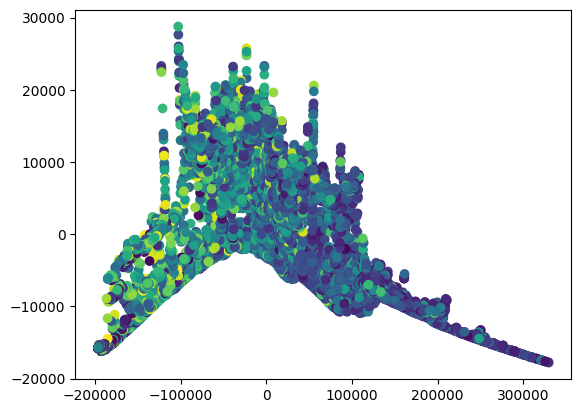

In [48]:
plt.scatter(X_iso[:,0], X_iso[:,1], c=y1[:10000])

# PCA

In [16]:
import numpy as np
def pca(X, n_components):
    # среднее значение каждого признака
    mean_vec = np.mean(X, axis=0)

    # центрирование данных
    X_centered = X - mean_vec

    # ковариационной матрицы
    cov_mat = np.cov(X_centered.T)

    # расчет собственных значений и собственных векторов
    eig_vals, eig_vecs = np.linalg.eigh(cov_mat)

    # сортировка собственных значений в порядке убывания
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    # выбор компонент с наибольшими собственными значениями
    w = np.hstack([eig_pairs[i][1].reshape(-1, 1) for i in range(n_components)])

    # проецирование данных на новое пространство
    X_pca = X_centered.dot(w)

    return X_pca

In [17]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def test_cl(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [21]:
import pandas as pd

df2 = pd.read_csv("../data/card_transdata.csv")[:100000]

X2 = df2.drop(['fraud'], axis=1)
y2 = df2['fraud']


X_pca = pca(X2, n_components=4)

print(X2.shape)
print(X_pca.shape)

test_cl(X_pca, y2)

(100000, 7)
(100000, 4)
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     27309
         1.0       0.93      0.97      0.95      2691

    accuracy                           0.99     30000
   macro avg       0.96      0.98      0.97     30000
weighted avg       0.99      0.99      0.99     30000

